In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics 
import matplotlib.pyplot as plt
%matplotlib inline 

## 1. Load the data

In [3]:
ap = pd.read_csv("../../assets/datasets/airport_cancellations.csv")
ap.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


## 2. Format and graph the data

#### 2.1 Convert the class lables (airports) to numeric

In [4]:
def air_to_numeric(x):
    if x=='ABQ':
        return 1
    if x=='ANC':
        return 2
    if x=='ATL':
        return 3

In [6]:
ap['Airport'] = ap['Airport'].apply(air_to_numeric)

#### 2.2. Define your variables

In [7]:
X = ap.ix[:,1:12]
y = ap.ix[:,0]

#### 2.3 Standardize the data

In [8]:
X = StandardScaler().fit_transform(X)

In [9]:
print(X)

[[-1.57987742 -0.57228382 -0.5562946  -0.59403416 -0.54038823]
 [-1.26303603 -0.58372908 -0.57909098 -0.6520932  -0.59731099]
 [-0.94619465 -0.49053199 -0.50867549 -0.59403416 -0.19885164]
 ..., 
 [ 0.95485367 -0.64041035 -0.62113763 -0.785629   -0.61482569]
 [ 1.27169505 -0.60879964 -0.59783467 -0.6462873  -0.66299111]
 [ 1.58853644 -0.6071646  -0.5968215  -0.68692863 -0.57103895]]


#### 2.4 Plot the data

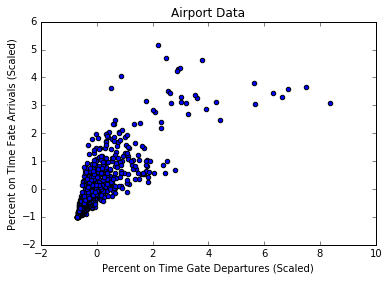

In [10]:
plt.scatter(X[:,1], X[:,3])
plt.xlabel("Percent on Time Gate Departures (Scaled)")
plt.ylabel("Percent on TIme Fate Arrivals (Scaled)")
plt.title("Airport Data")

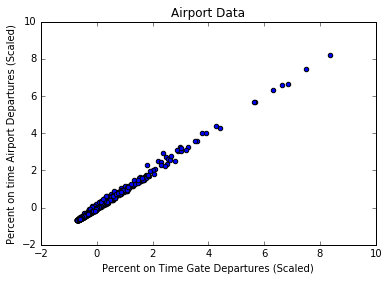

In [11]:
plt.scatter(X[:,1], X[:,2])
plt.xlabel("Percent on Time Gate Departures (Scaled)")
plt.ylabel("Percent on time Airport Departures (Scaled)")
plt.title("Airport Data")

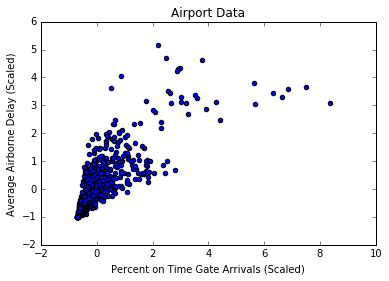

In [14]:
plt.scatter(X[:,1], X[:,3])
plt.xlabel("Percent on Time Gate Arrivals (Scaled)")
plt.ylabel("Average Airborne Delay (Scaled)")
plt.title("Airport Data")

## 4. DBSCAN

#### 4.1 Setup the DBSCAN from scikit

In [ ]:
dbscn = DBSCAN(eps = .7, min_samples = 10).fit(X)  

#### 4.2 Calculate the Labels

In [ ]:
labels = dbscn.labels_  

In [ ]:
print(labels)

#### 4.2 Calculate the Core Samples

In [ ]:
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 

#### 4.3 Plot the resulting clusters

In [ ]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

In [ ]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,1],xy[:,3], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,1],xy2[:,3], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Airport Operations Data")

Now, repeat the above steps for various levels of minimum points and epsilon and see how that affects the results of the DBSCAN algorithm 

#### 4.4 Perform a K-means Clustering for comparison

In [ ]:
kmeans = KMeans(n_clusters = 9).fit(X)

In [ ]:
labels_km = kmeans.labels_
centroids = kmeans.cluster_centers_

#### 4.5 Plot the resulting clusters

**Hint**: Display the results by cluster color and plot the centroids over the original plot for clarity

*Average airborne delay* and *on time gate arrivals*

In [ ]:
plt.scatter(X[:,8], X[:,3], c = labels_km)
plt.scatter(centroids[:,8], centroids[:,3], c = ["red","blue"], s = 60 )

*average taxi out time* and *average airport departure delay*

In [ ]:
plt.scatter(X[:,5], X[:,7], c = labels_km)
plt.scatter(centroids[:,5], centroids[:,7], c = ["red","blue"], s = 60 )